# Deep Learning Basics
## MultiLayer Perceptron/ Feed Forward Architecture
### Implementing a 3 Layer Neural Network from scratch
<img src="https://github.com/prateek27/deep-neural-network/blob/master/images/neural_net.gif?raw=true" alt="Perceptron" style="width: 450px;" />


#### **Learning Goals**(Theory + Implementation)
- Understand the Multilayer Perpcetron (MLP) Architecture
- Understanding Forward Propagation & Backpropagtion, Loss & Activation Fn's
- Making Predictions
- Checking classification performance on different datasets
- Classification Project 

### Part-1 Implementation Forward Propagation
- Understanding the architecture
- One Layer, Two Layer and Three Layer Networks
- Building a 3 Layer MLP(with 2 hidden layers)
- Writing the code

### Part-2 Implementation Forward Propagation
- How to pass one example? [DONE]
- How to pass multiples examples(Vectorization)?
- Understanding what is softmax?
- Writing the code

# Part -I Neural Architecture



#### **1 Layer Network** 
<img src="https://github.com/prateek27/deep-neural-network/blob/master/images/perceptron.png?raw=true" alt="Perceptron" style="width: 300px;" />
- Simplest unit Perceptron
- Only one output unit
- No hidden units
- Input is not counted in layers



#### **2 Layer Network** 
<img src="https://github.com/prateek27/deep-neural-network/blob/master/images/one_white.png?raw=true" alt="Perceptron" style="width: 450px; background-color:black;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron or feed forward net or deep forward net


#### **3 Layer Network** 
<img src="https://github.com/prateek27/deep-neural-network/blob/master/images/two_white.png?raw=true" alt="Perceptron" style="width: 550px; background-color:black;" />

- Two layers 1 Hidden + 1 output
- Multi-layer perceptron/feed forward net/deep forward net

### Part-3
# Backpropagation Algorithm!
#### Building a Multi-layer neural network for Pokemon Classification from scratch

<img src="https://github.com/prateek27/deep-neural-network/blob/master/images/pokemon_back.jpg?raw=true" alt="pokemon_back.jpg" style="width: 800px;" />


- One of the most difficult/trickiest things in ML to get right
- Why do we need this?

<img src="https://github.com/prateek27/deep-neural-network/blob/master/images/1-1.gif?raw=true" alt="Perceptron" style="width: 550px;" />

- Quite Mathematical, challenging to understand
- **Good Thing** - As a deep learning engineer, you never have to implement backpropagation from scratch.... 
###  but we are going build it from scratch :D !!

In [8]:
import numpy as np

In [9]:
# Model Params
input_size = 2 # No. of features
layers = [4,3] # No. of neurons in 1st and 2nd layers
output_size = 3 # No..of outputs

In [10]:
def softmax(a):
    ea = np.exp(a)
    ans = ea/np.sum(ea, axis=1, keepdims=True)
    return ans

print(softmax(np.array([[10,10],[10,20]])))

[[  5.00000000e-01   5.00000000e-01]
 [  4.53978687e-05   9.99954602e-01]]


In [11]:
class NeuralNetwork:
    
    def __init__(self, input_size, layers, output_size):
        np.random.seed(0)
        
        # Dictionary
        model = {}
        
        # First Layer
        model['W1'] = np.random.randn(input_size, layers[0])
        model['b1'] = np.zeros((1, layers[0]))
        
        # Second Layer
        model['W2'] = np.random.randn(layers[0], layers[1])
        model['b2'] = np.zeros((1, layers[1]))
        
        # Third/Output Layer
        model['W3'] = np.random.randn(layers[1], output_size)
        model['b3'] = np.zeros((1, output_size))
        
        self.model = model
        
    def forward(self, x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x, W1) + b1
        a1 = np.tanh(z1) #tanh is substitute of sigmoid
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self, x, y, learning_rate=0.001):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dW3 = np.dot(a2.T, delta3)/float(m)
        dB3 = np.sum(delta3, axis=0)/float(m)
        
        # Derivative of tanh(z) = (1-(tanh(z))**2)
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dW2 = np.dot(a1.T, delta2)/float(m)
        dB2 = np.sum(delta2, axis=0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dW1 = np.dot(X.T, delta1)/float(m)
        dB1 = np.sum(delta1, axis=0)/float(m)
        
        # Update model params using gradient descent
        self.model['W1'] -= learning_rate*dW1 
        self.model['b1'] -= learning_rate*dB1
        
        self.model['W2'] -= learning_rate*dW2
        self.model['b2'] -= learning_rate*dB2
        
        self.model['W3'] -= learning_rate*dW3
        self.model['b3'] -= learning_rate*dB3
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out, axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("a2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("a3 ",a3.shape)
        

In [19]:
def loss(y_oht, p):
    # Categorical cross entropy
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y, depth):
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m), y] = 1
    return y_oht

## Generating Data

In [13]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [14]:
X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


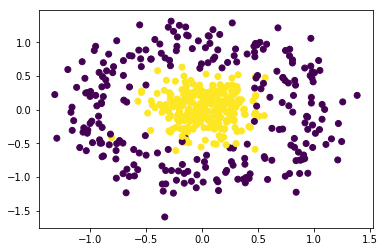

In [15]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

## Training Model

In [64]:
model = NeuralNetwork(input_size=2, layers=[10,5], output_size=2)

In [65]:
def Train(X,Y,model,epochs,learning_rate=0.01, logs=True):
    trainingLoss = []
    
    classes = 2;
    Y_OHT = one_hot(Y, classes)
    
    for ix in range(epochs):
        Y_ = model.forward(X)
        l = loss(Y_OHT, Y_)
        trainingLoss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
    return trainingLoss

In [66]:
losses = Train(X,Y,model,1000,learning_rate=0.01,logs=True)

Epoch 0 Loss 0.3571
Epoch 1 Loss 0.3513
Epoch 2 Loss 0.3462
Epoch 3 Loss 0.3416
Epoch 4 Loss 0.3375
Epoch 5 Loss 0.3338
Epoch 6 Loss 0.3306
Epoch 7 Loss 0.3276
Epoch 8 Loss 0.3250
Epoch 9 Loss 0.3226
Epoch 10 Loss 0.3204
Epoch 11 Loss 0.3184
Epoch 12 Loss 0.3166
Epoch 13 Loss 0.3149
Epoch 14 Loss 0.3133
Epoch 15 Loss 0.3119
Epoch 16 Loss 0.3105
Epoch 17 Loss 0.3093
Epoch 18 Loss 0.3081
Epoch 19 Loss 0.3069
Epoch 20 Loss 0.3059
Epoch 21 Loss 0.3049
Epoch 22 Loss 0.3039
Epoch 23 Loss 0.3030
Epoch 24 Loss 0.3021
Epoch 25 Loss 0.3012
Epoch 26 Loss 0.3004
Epoch 27 Loss 0.2996
Epoch 28 Loss 0.2989
Epoch 29 Loss 0.2981
Epoch 30 Loss 0.2974
Epoch 31 Loss 0.2967
Epoch 32 Loss 0.2960
Epoch 33 Loss 0.2953
Epoch 34 Loss 0.2946
Epoch 35 Loss 0.2939
Epoch 36 Loss 0.2933
Epoch 37 Loss 0.2927
Epoch 38 Loss 0.2920
Epoch 39 Loss 0.2914
Epoch 40 Loss 0.2908
Epoch 41 Loss 0.2902
Epoch 42 Loss 0.2896
Epoch 43 Loss 0.2890
Epoch 44 Loss 0.2885
Epoch 45 Loss 0.2879
Epoch 46 Loss 0.2873
Epoch 47 Loss 0.2868
Ep

Epoch 446 Loss 0.1731
Epoch 447 Loss 0.1729
Epoch 448 Loss 0.1727
Epoch 449 Loss 0.1725
Epoch 450 Loss 0.1724
Epoch 451 Loss 0.1722
Epoch 452 Loss 0.1720
Epoch 453 Loss 0.1719
Epoch 454 Loss 0.1717
Epoch 455 Loss 0.1715
Epoch 456 Loss 0.1714
Epoch 457 Loss 0.1712
Epoch 458 Loss 0.1710
Epoch 459 Loss 0.1709
Epoch 460 Loss 0.1707
Epoch 461 Loss 0.1706
Epoch 462 Loss 0.1704
Epoch 463 Loss 0.1702
Epoch 464 Loss 0.1701
Epoch 465 Loss 0.1699
Epoch 466 Loss 0.1697
Epoch 467 Loss 0.1696
Epoch 468 Loss 0.1694
Epoch 469 Loss 0.1692
Epoch 470 Loss 0.1691
Epoch 471 Loss 0.1689
Epoch 472 Loss 0.1688
Epoch 473 Loss 0.1686
Epoch 474 Loss 0.1684
Epoch 475 Loss 0.1683
Epoch 476 Loss 0.1681
Epoch 477 Loss 0.1680
Epoch 478 Loss 0.1678
Epoch 479 Loss 0.1676
Epoch 480 Loss 0.1675
Epoch 481 Loss 0.1673
Epoch 482 Loss 0.1672
Epoch 483 Loss 0.1670
Epoch 484 Loss 0.1669
Epoch 485 Loss 0.1667
Epoch 486 Loss 0.1665
Epoch 487 Loss 0.1664
Epoch 488 Loss 0.1662
Epoch 489 Loss 0.1661
Epoch 490 Loss 0.1659
Epoch 491 

Epoch 861 Loss 0.1242
Epoch 862 Loss 0.1241
Epoch 863 Loss 0.1241
Epoch 864 Loss 0.1240
Epoch 865 Loss 0.1239
Epoch 866 Loss 0.1238
Epoch 867 Loss 0.1238
Epoch 868 Loss 0.1237
Epoch 869 Loss 0.1236
Epoch 870 Loss 0.1235
Epoch 871 Loss 0.1234
Epoch 872 Loss 0.1234
Epoch 873 Loss 0.1233
Epoch 874 Loss 0.1232
Epoch 875 Loss 0.1231
Epoch 876 Loss 0.1231
Epoch 877 Loss 0.1230
Epoch 878 Loss 0.1229
Epoch 879 Loss 0.1228
Epoch 880 Loss 0.1227
Epoch 881 Loss 0.1227
Epoch 882 Loss 0.1226
Epoch 883 Loss 0.1225
Epoch 884 Loss 0.1224
Epoch 885 Loss 0.1224
Epoch 886 Loss 0.1223
Epoch 887 Loss 0.1222
Epoch 888 Loss 0.1221
Epoch 889 Loss 0.1221
Epoch 890 Loss 0.1220
Epoch 891 Loss 0.1219
Epoch 892 Loss 0.1218
Epoch 893 Loss 0.1218
Epoch 894 Loss 0.1217
Epoch 895 Loss 0.1216
Epoch 896 Loss 0.1215
Epoch 897 Loss 0.1214
Epoch 898 Loss 0.1214
Epoch 899 Loss 0.1213
Epoch 900 Loss 0.1212
Epoch 901 Loss 0.1212
Epoch 902 Loss 0.1211
Epoch 903 Loss 0.1210
Epoch 904 Loss 0.1209
Epoch 905 Loss 0.1209
Epoch 906 

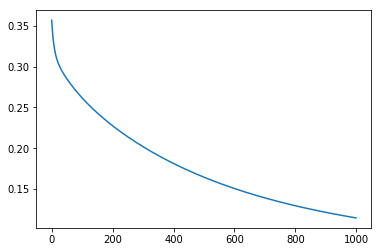

In [67]:
plt.plot(losses)
plt.label
plt.show()

## Visualize boundry

In [68]:
from visualize import plot_decision_boundary

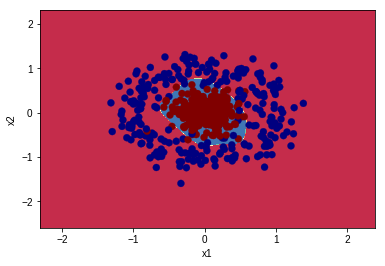

In [69]:
plot_decision_boundary(lambda x:model.predict(x), X, Y)

## Accuracy

In [70]:
outputs = model.predict(X)

In [71]:
training_accuracy = np.sum(outputs==Y)/Y.shape[0]
print("Training accuracy is %.4f"%(training_accuracy*100))

Training accuracy is 95.6000


## Other Datasets

In [83]:
from sklearn.datasets import make_moons, make_classification

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1) #Perceptron
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Xor Training accuracy = 100.0000


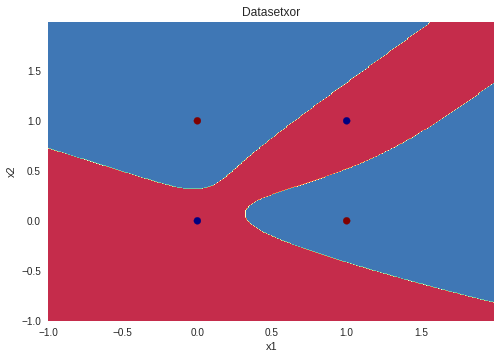

Classification Training accuracy = 95.6000


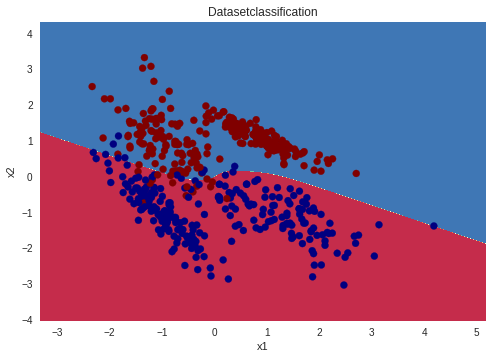

Moons Training accuracy = 95.6000


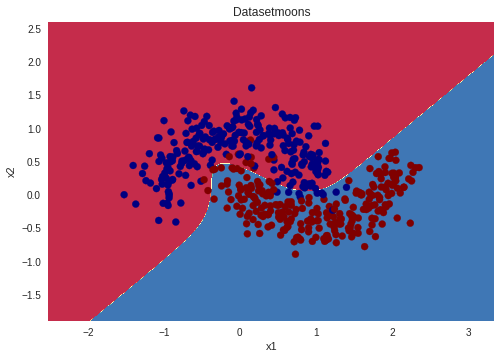

Circles Training accuracy = 97.0000


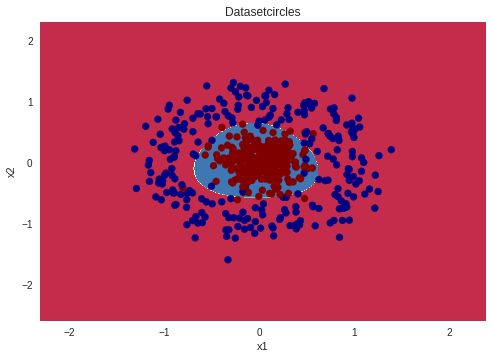

In [89]:
datasets = ["xor","classification","moons","circles"]

for dataset in datasets:
    model = NeuralNetwork(input_size=2, layers=[3,4], output_size=2)
    X,Y = load_dataset(dataset)
    Train(X,Y,model,5000,logs=False)
    output = model.predict(X)
    
    training_accuracy = np.sum(output==Y)/Y.shape[0]
    print(dataset.title(),"Training accuracy = %.4f"%(training_accuracy*100))
    
    plt.title("Dataset"+dataset)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()